In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt


%matplotlib inline

### matplotlib backend 
Selected using *%matplotlib* magic. Can be 
<p>
**inline** : plots rendered in the output and the backend is closed after the cell execution.
</p><p>
**notebook**: plots rendered in the output, but backend remains open for subsequent cells add additional rendering.
</p>

In [2]:
# show current backend
mpl.get_backend()

'module://ipykernel.pylab.backend_inline'

## Plot - Lines and Points

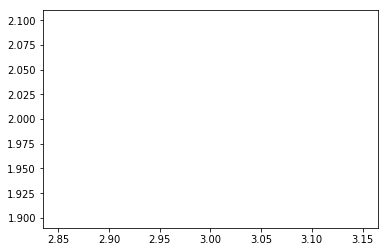

In [3]:
# plot takes x, y args. By defaults plots line.  Since single point can not make a visible line, we see nothing.
plt.plot(3,2)

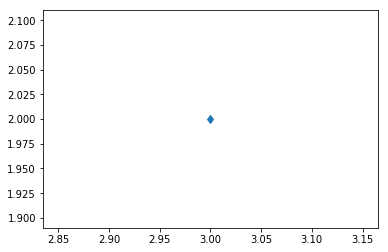

In [4]:
# we will ask a plot to draw a marker. Shapes are indicated by letter (d = Diamond, s = Square, etc...)
plt.plot(3,2, 'd')

(-2, 2)

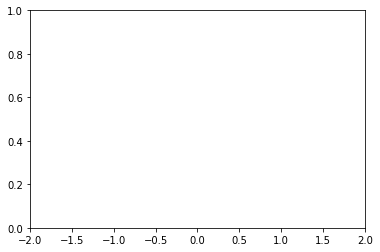

In [5]:
# create a default figure, axes and return current axes
ax = plt.gca()

# change x axis limits 
ax.set_xlim([-2, 2])

### Marker styles

In [6]:
# Available markers of styles
print(mpl.markers.MarkerStyle.markers)

{'.': 'point', ',': 'pixel', 'o': 'circle', 'v': 'triangle_down', '^': 'triangle_up', '<': 'triangle_left', '>': 'triangle_right', '1': 'tri_down', '2': 'tri_up', '3': 'tri_left', '4': 'tri_right', '8': 'octagon', 's': 'square', 'p': 'pentagon', '*': 'star', 'h': 'hexagon1', 'H': 'hexagon2', '+': 'plus', 'x': 'x', 'D': 'diamond', 'd': 'thin_diamond', '|': 'vline', '_': 'hline', 'P': 'plus_filled', 'X': 'x_filled', 0: 'tickleft', 1: 'tickright', 2: 'tickup', 3: 'tickdown', 4: 'caretleft', 5: 'caretright', 6: 'caretup', 7: 'caretdown', 8: 'caretleftbase', 9: 'caretrightbase', 10: 'caretupbase', 11: 'caretdownbase', 'None': 'nothing', None: 'nothing', ' ': 'nothing', '': 'nothing'}


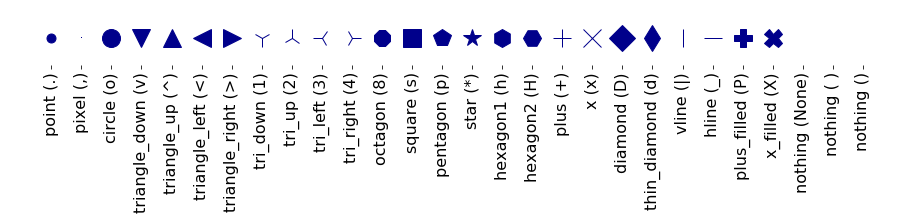

In [7]:
# show availabe marker styles
fig, ax = plt.subplots(1,1, figsize=(16,1))
styles, ticks = [], []
for style, name  in mpl.markers.MarkerStyle.markers.items():
    if isinstance(style, str): # and name != 'nothing':
        styles.append(style)
        ticks.append("{} ({})".format(name, style))
        

for i, style in enumerate(styles):
    plt.plot(i, 1, style, markersize=18, c='darkblue')
    
ax.set_xticks(range(len(ticks)))
ax.set_xticklabels(ticks, rotation='vertical', fontsize=16);
ax.yaxis.set_visible(False)


# remove the border
for sp in ax.spines.values():
    sp.set_visible(False)


### Line Styles

In [8]:
mpl.lines.Line2D.lineStyles

{'': '_draw_nothing',
 ' ': '_draw_nothing',
 '-': '_draw_solid',
 '--': '_draw_dashed',
 '-.': '_draw_dash_dot',
 ':': '_draw_dotted',
 'None': '_draw_nothing'}

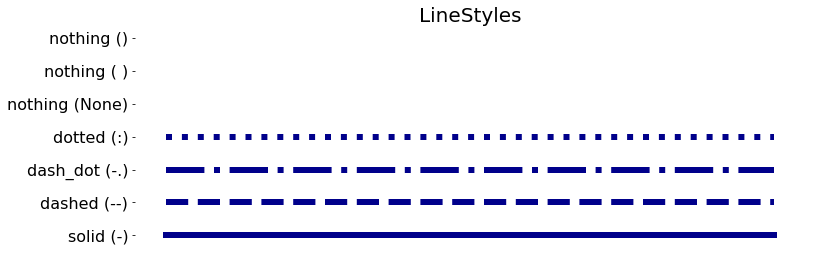

In [9]:
# show availabe line styles
fig, ax = plt.subplots(1,1, figsize=(12,4))

styles, ticks = [], []
for style, name  in mpl.lines.Line2D.lineStyles.items():
    name = name.replace('_draw_', '')
    styles.append(style)
    ticks.append("{} ({})".format(name, style))        

for i, style in enumerate(styles):
    plt.plot([0, 5], [i, i], linestyle=style, c='darkblue', linewidth=6)
    
ax.set_yticks(range(len(ticks)))
ax.set_yticklabels(ticks, fontsize=16);
ax.xaxis.set_visible(False)
ax.set_title('LineStyles', fontsize=20)

# remove the border
for sp in ax.spines.values():
    sp.set_visible(False)

#### Plot mulitple lines - with different linestyles, anti-aliasing and colors

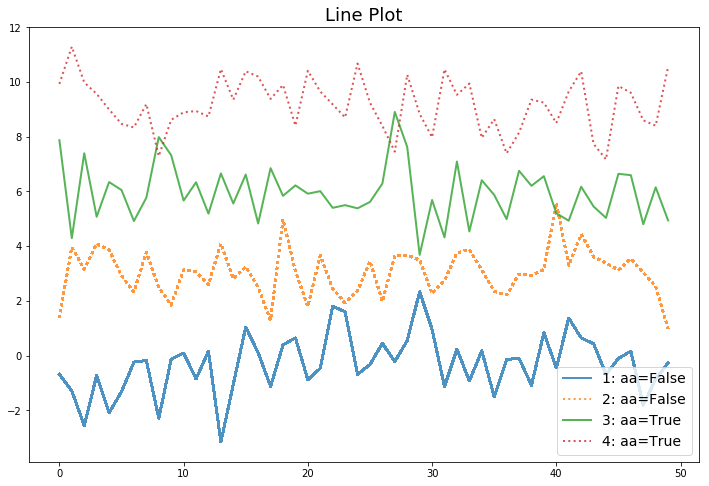

In [11]:
# multiple lines in a plot 
line_props = {
    'c': ['r', 'g', 'b', 'o'],
    'aa': [False, False, True, True],
    'ls': ['-', ':', '-', ':']
}
number_of_points = 50
number_of_lines = len(line_props['c'])

data = np.random.normal(size=(number_of_lines, number_of_points))
# add bias to random data
for i in range(number_of_lines):
    data[i, :] = data[i, :] + i * 3
    
fig, ax = plt.subplots(1, 1, figsize=(12,8))
for i in range(number_of_lines):
    ls = line_props['ls'][i]
    aa = line_props['aa'][i]
    c = line_props['c'][i]
    label = "{}: aa={}".format(i+1, aa)
    plt.plot(range(number_of_points), data[i, :], linestyle=ls, linewidth=2, alpha=.8, label=label, aa=aa)
ax.legend(fontsize=14)  # ; at the end of last statement suppresses Jupyter output of the returned object repr()
ax.set_title('Line Plot', fontsize=18);


#### Fill Between lines

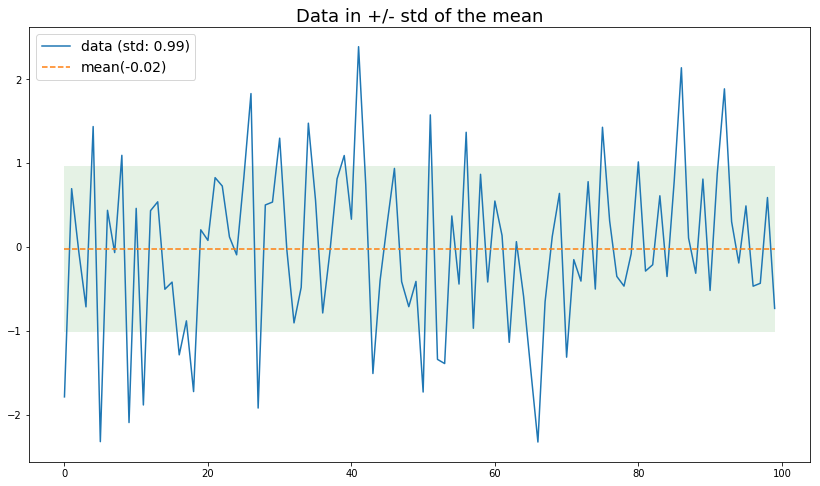

In [88]:
N = 100
y = np.random.normal(size=N)
mean, std = np.mean(y), np.std(y)

y_mean = [mean] * N
upper_std = [mean + std] * N
lower_std = [mean - std] * N

fig, ax = plt.subplots(1, 1, figsize=(14,8))
ax.plot(range(N), y, '-', label='data (std: {:.2f})'.format(std))
ax.plot(range(N), y_mean, '--', label='mean({:.2f})'.format(mean))
ax.fill_between(range(N), upper_std, lower_std, facecolor='green', alpha=.1)
ax.legend(fontsize=14)
ax.set_title('Data in +/- std of the mean', fontsize=18);


#### datetime ticks

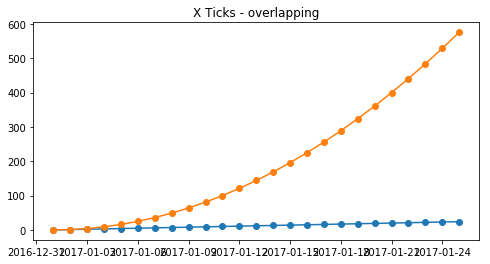

In [133]:
# x = np.arange('2017-01-01', '2017-01-09', dtype='datetime64[D]')  # daily
x = pd.date_range('2017-01-01', '2017-01-25')
y = np.arange(len(x))
exp_y = y ** 2

fig, ax = plt.subplots(1, 1, figsize=(8,4))
ax.plot(x, y, '-o',  x, exp_y, '-o')
ax.set_title('X Ticks - overlapping', fontsize=18);


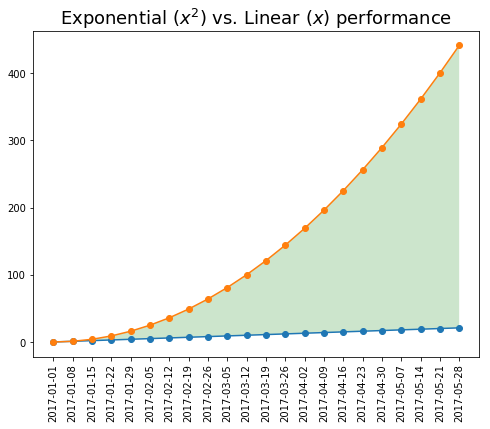

In [137]:
# rotation of the xtick labels  and fill between
x = pd.date_range('2017-01-01', '2017-05-30', freq='1w')
y = np.arange(len(x))
exp_y = y ** 2

fig, ax = plt.subplots(1, 1, figsize=(8,6))
ax.plot(x, y, '-o',  x, exp_y, '-o')
ax.fill_between(x, y, exp_y, facecolor='green', alpha=.2)

ax.set_xticks(x)
tick_labels = ["{:%Y-%m-%d}".format(t) for t in x]
ax.set_xticklabels(tick_labels, rotation=90);

ax.set_title("Exponential ($x^2$) vs. Linear ($x$) performance", fontsize=18); # LaTex formatting


### Scatter plots

#### Simple scatter 

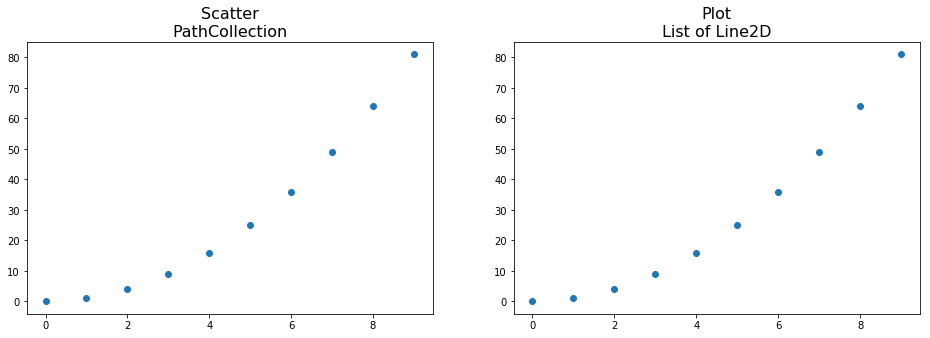

In [27]:
x = np.arange(10)
y = x ** 2

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,5))

r1 = ax1.scatter(x, y) 
ax1.set_title('Scatter\n{}'.format(type(r1).__name__), fontsize=16)

# same as below, but plots Line2D objects
r2 = ax2.plot(x, y, 'o')
ax2.set_title('Plot\nList of {}'.format(type(r2[0]).__name__), fontsize=16)


#### Scatter Plot: 2 class data

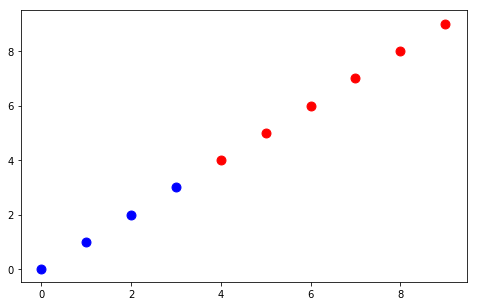

In [62]:
x = np.arange(10)
y = x


fig, ax = plt.subplots(1, 1, figsize=(8,5))
ax.scatter(x[:4], y[:4], s=80, c='blue') 
ax.scatter(x[4:], y[4:], s=80, c='red') 

#### Scatter: set colors of individual points

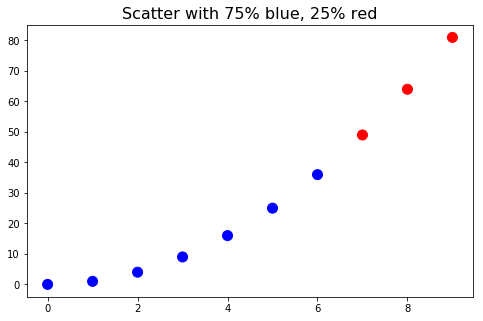

In [34]:
x = np.arange(10)
y = x ** 2
# 75% of points blue, remaining red
c = ['blue'] * int(len(x)*0.75)
c += ['red'] * (len(x) - len(c))

fig, ax = plt.subplots(1, 1, figsize=(8,5))
ax.scatter(x, y, s=100, c=c) 
ax.set_title('Scatter with 75% blue, 25% red', fontsize=16);


Heights: [ 4.82755348  5.38740555  5.42882547  4.71714768  5.39647164]
Weights:  [ 167.06862795  131.1948706   141.75549098  112.98372652  190.34142256]


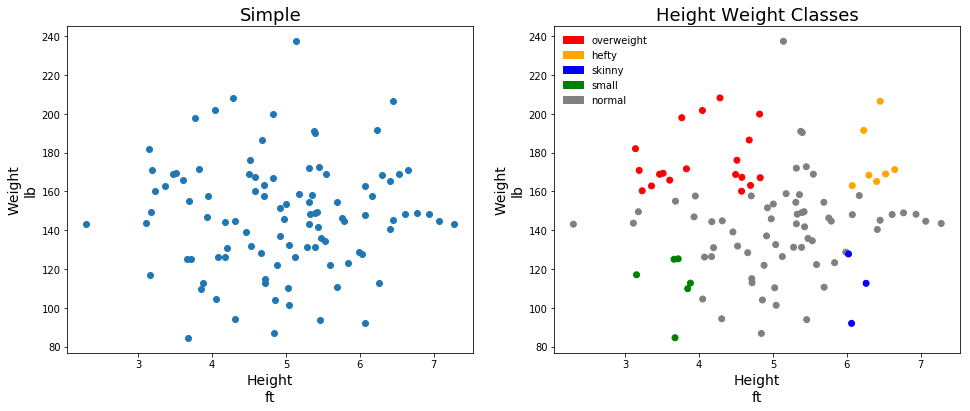

In [65]:
N = 100 # number of people
heights = np.random.normal(loc=5., scale=1, size=N)  # mean of 5.ft std: 1
weights = np.random.normal(loc=150, scale=25, size=N) # mean: 150lb std: 25lb
print('Heights:', heights[:5])
print('Weights: ', weights[:5])

# scatter plot of height vs weight
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,6))
ax1.scatter(heights, weights)
ax1.set_title('Simple', fontsize=18)
ax1.set_xlabel('Height\nft', fontsize=14)
ax1.set_ylabel('Weight\nlb', fontsize=14);

# colored - showing the classes
colors = []
classes = {
    'overweight': 'red',
    'hefty': 'orange',
    'skinny': 'blue',
    'small': 'green',
    'normal': 'gray'
}
for h,w in zip(heights, weights):
    c = classes['normal']
    if h > 6 and w > 160: # hefty
        c = classes['hefty']
    elif h < 4 and w < 130: # tiny
        c = classes['small']
    elif h > 6 and w < 140:
        c = classes['skinny']
    elif h < 5 and w > 160:
        c = classes['overweight']
    colors.append(c)

ax2.scatter(heights, weights, c=colors)
ax2.set_title('Height Weight Classes', fontsize=18)
ax2.set_xlabel('Height\nft', fontsize=14)
ax2.set_ylabel('Weight\nlb', fontsize=14);

# create custom legend
handles = [mpl.patches.Patch(color=c, label=n) for n, c in classes.items()]
ax2.legend(handles=handles, frameon=False);

#### Objects in a chart

In [66]:
# Artist objects in a Axes
ax2.get_children()

# Pathcollection: scatter plot points
# Spines: 4 border frame around the graph
# X, Y Axis
# Text: Title, XLabel, YLabel
# Lengend
# Axes Rectangle

In [67]:
# Artist can have children - Tree Walk
def show_children(artist, depth=0):
    if isinstance(artist, mpl.artist.Artist):
        print("  " * depth + str(artist))
        for child in artist.get_children():
            show_children(child, depth+2)
show_children(ax2.get_legend())

Legend
            Text(0,0,'None')
                        Rectangle(-0,-0;20x7)
                        Text(0,0,'overweight')
                        Rectangle(-0,-0;20x7)
                        Text(0,0,'hefty')
                        Rectangle(-0,-0;20x7)
                        Text(0,0,'skinny')
                        Rectangle(-0,-0;20x7)
                        Text(0,0,'small')
                        Rectangle(-0,-0;20x7)
                        Text(0,0,'normal')
    FancyBboxPatch(559.382,301.56;91.875x78)
